##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?



In [857]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
from IPython.display import display #display dataframes and df methods
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action='ignore')


## Scores.csv

In [858]:
scores = pd.read_csv('SCORES.csv')
display(scores.head())
display(scores.describe())
display(scores.shape)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


(25, 2)

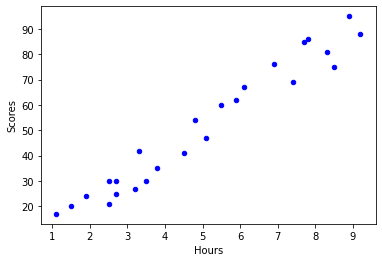

In [859]:
scores.plot.scatter(x = 'Hours', y = 'Scores', color='Blue')
plt.show()

In [860]:
X_train, X_test, y_train, y_test = train_test_split(scores[['Hours']], scores[['Scores']], test_size=0.3, random_state=42)

#display(X_train)
#display(X_test)
#display(y_train)
#display(y_test)

reg = LinearRegression().fit(X_train, y_train)
score = reg.score(X_train, y_train)
coef = reg.coef_
intercept = reg.intercept_

In [861]:
print("Score: {}".format(score)) #score is the coefficient of determination of the prediction.
print("Coef: {}".format(coef)) #wektor współczynników struktury modelu liniowej regresji
print("Intercept: {}".format(intercept)) #jest to punkt przecięcia się z osią y gdy wszystkie predyktory są równe 0


Score: 0.9536486503889446
Coef: [[9.71054094]]
Intercept: [2.79419668]


In [862]:
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape((-1,1))
y_pred = reg.predict(X_test)
for i in range(len(X_test)):
    print('y_test = {}, y_pred = {}, abs diff = {}'.format(y_test[i], y_pred[i],np.abs(y_test[i] - y_pred[i])))


y_test = [81], y_pred = [83.39168645], abs diff = [2.39168645]
y_test = [30], y_pred = [27.07054902], abs diff = [2.92945098]
y_test = [21], y_pred = [27.07054902], abs diff = [6.07054902]
y_test = [76], y_pred = [69.79692914], abs diff = [6.20307086]
y_test = [62], y_pred = [60.0863882], abs diff = [1.9136118]
y_test = [25], y_pred = [29.0126572], abs diff = [4.0126572]
y_test = [42], y_pred = [34.83898177], abs diff = [7.16101823]
y_test = [47], y_pred = [52.31795545], abs diff = [5.31795545]


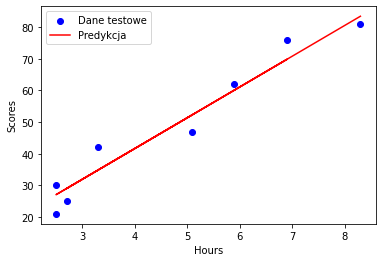

In [863]:
plt.scatter(x = X_test, y = y_test, color='Blue')
plt.plot(X_test, y_pred, color='Red')
plt.legend(['Dane testowe', 'Predykcja'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

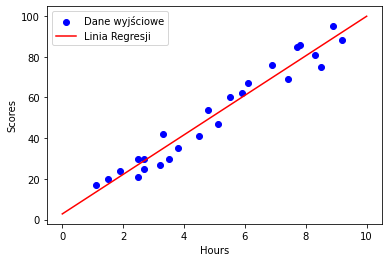

In [864]:
def line(x: int):
    return coef[0][0] * x + intercept[0]

plt.scatter(x = scores['Hours'], y = scores['Scores'], color='Blue')
line_args = np.linspace(0,10)
plt.plot(line_args,line(line_args), color='Red')
plt.legend(['Dane wyjściowe', 'Linia Regresji'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()



In [865]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('Średni błąd bezwzględny (Mean Absolute Error) = {}'.format(MAE))
print('Błąd średniokwadratowy (Mean Squared Error) = {}'.format(MSE))
print('Pierwiastek błędu średniokwadratowego (Root Mean Squared Error) = {}'.format(RMSE))


Średni błąd bezwzględny (Mean Absolute Error) = 4.499999999999998
Błąd średniokwadratowy (Mean Squared Error) = 23.61945761415174
Pierwiastek błędu średniokwadratowego (Root Mean Squared Error) = 4.859985351228103


## SBP.csv

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132
5,68,130
6,66,127
7,77,163
8,63,136
9,54,115


,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


,Age,SBP
count,19.000000,19.000000
mean,64.947368,129.421053
std,7.214751,13.454928
min,54.000000,111.000000
25%,60.500000,119.000000
50%,63.000000,129.000000
75%,68.500000,137.000000
max,79.000000,163.000000


(19, 2)

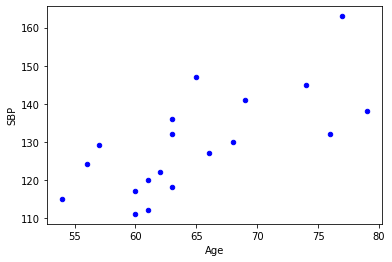

In [866]:
SBP= pd.read_csv('SBP.csv')
display(SBP)
display(SBP.head())
display(SBP.describe())
display(SBP.shape)
SBP.plot.scatter(x='Age', y='SBP', color='Blue')
plt.show()

In [867]:
X_train, X_test, y_train, y_test = train_test_split(SBP[['Age']], SBP[['SBP']], test_size=0.3,
                                                    random_state=42)

#display(X_train)
#display(X_test)
#display(y_train)
#display(y_test)

reg = LinearRegression().fit(X_train, y_train)
score = reg.score(X_train, y_train)
coef = reg.coef_
intercept = reg.intercept_
print("Score: {}".format(score))  #score is the coefficient of determination of the prediction.
print("Coef: {}".format(coef))  #wektor współczynników struktury modelu liniowej regresji
print("Intercept: {}".format(intercept))  #jest to punkt przecięcia się z osią y gdy wszystkie predyktory są równe 0

Score: 0.5494410762946278
Coef: [[1.44882707]]
Intercept: [36.17936475]


y_test = [117], y_pred = [123.108989], abs diff = [6.108989]
y_test = [130], y_pred = [134.69960556], abs diff = [4.69960556]
y_test = [132], y_pred = [146.29022213], abs diff = [14.29022213]
y_test = [120], y_pred = [124.55781607], abs diff = [4.55781607]
y_test = [136], y_pred = [127.45547021], abs diff = [8.54452979]
y_test = [141], y_pred = [136.14843263], abs diff = [4.85156737]


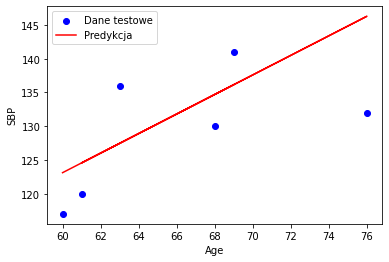

In [868]:
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape((-1, 1))
y_pred = reg.predict(X_test)
for i in range(len(X_test)):
    print('y_test = {}, y_pred = {}, abs diff = {}'.format(y_test[i], y_pred[i], np.abs(y_test[i] - y_pred[i])))

plt.scatter(x=X_test, y=y_test, color='Blue')
plt.plot(X_test, y_pred, color='Red')
plt.legend(['Dane testowe', 'Predykcja'])
plt.xlabel("Age")
plt.ylabel("SBP")
plt.show()


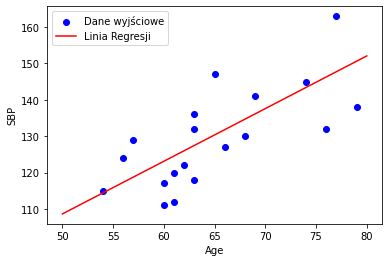

In [869]:
def line(x: int):
    return coef[0][0] * x + intercept[0]


plt.scatter(x=SBP['Age'], y=SBP['SBP'], color='Blue')
line_args = np.linspace(50, 80)
plt.plot(line_args, line(line_args), color='Red')
plt.legend(['Dane wyjściowe', 'Linia Regresji'])
plt.xlabel("Age")
plt.ylabel("SBP")
plt.show()

In [870]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('Średni błąd bezwzględny (Mean Absolute Error) = {}'.format(MAE))
print('Błąd średniokwadratowy (Mean Squared Error) = {}'.format(MSE))
print('Pierwiastek błędu średniokwadratowego (Root Mean Squared Error) = {}'.format(RMSE))

Średni błąd bezwzględny (Mean Absolute Error) = 7.175454985814118
Błąd średniokwadratowy (Mean Squared Error) = 63.48947834957039
Pierwiastek błędu średniokwadratowego (Root Mean Squared Error) = 7.968028510840708


Uzyskane z modelu wyniki dla danych 'SBP.csv'są mniej zadowalające jak dla danych 'Scores.csv' O czym świadczy wartość współczynnika **score = 0.5494410762946278**

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?


In [871]:
PETROL = pd.read_csv('PETROL.csv')
display(PETROL.head())
display(PETROL.describe())
display(PETROL.shape)


,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


(48, 5)

In [872]:
X = PETROL[['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']]
y = PETROL[['Zuzycie_paliwa']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42)
reg = LinearRegression().fit(X_train, y_train)
score = reg.score(X_train, y_train)
coef = reg.coef_
intercept = reg.intercept_
print("Score: {}".format(score))
print("Coef: {}".format(coef))
print("Intercept: {}".format(intercept))
y_pred = reg.predict(X_test)

Score: 0.6901809459027917
Coef: [[-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03]]
Intercept: [513.1398382]


In [873]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('Średni błąd bezwzględny (Mean Absolute Error) = {}'.format(MAE))
print('Błąd średniokwadratowy (Mean Squared Error) = {}'.format(MSE))
print('Pierwiastek błędu średniokwadratowego (Root Mean Squared Error) = {}'.format(RMSE))


Średni błąd bezwzględny (Mean Absolute Error) = 63.02652446557485
Błąd średniokwadratowy (Mean Squared Error) = 8076.669020354741
Pierwiastek błędu średniokwadratowego (Root Mean Squared Error) = 89.8702899759133


Uzyskane wyniki predykcji modelu nie są idealne. Wartość  'score', czyli współczynnik determinacji predykcji (coefficient of determination of the prediction) wynosi w przybliżeniu 0.64 i jest to lepsza wartość niż dla danych SBP, ale dużo gorsza od danych SCORES. Wartości błędu bezwzględnego czy średniokwadratowej cechują się dużymi wartościami. Negatywny wpływ na wynik mógł mieć duży rozstrzał wartości danych dla relacji pomiędzy 'zużyciem paliwa' a innymi niektórymi kolumnami.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```


### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [874]:
HEARTS = pd.read_csv('HEART.csv')
display(HEARTS)
display(HEARTS.head())
display(HEARTS.describe())
display(HEARTS.shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


(294, 14)

In [875]:
HEARTS = HEARTS.replace(to_replace='?', value= np.nan)
HEARTS = HEARTS.drop(labels=['ca', 'slope', 'thal'], axis=1).dropna()
HEARTS = HEARTS.rename(columns={'num       ':'num'})
HEARTS = pd.get_dummies(HEARTS, columns=['cp', 'restecg'])
X = HEARTS.drop(['num'], axis=1)
y = HEARTS['num']

In [876]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=42)
X_train = preprocessing.MinMaxScaler().fit_transform(X_train) #scale to 0-1 range
X_test = preprocessing.MinMaxScaler().fit_transform(X_test)

reg = LogisticRegression().fit(X_train, y_train)
score = reg.score(X_train, y_train)
coef = reg.coef_
intercept = reg.intercept_
print("Score: {}".format(score))
print("Coef: {}".format(coef))
print("Intercept: {}".format(intercept))
y_pred = reg.predict(X_test)

Score: 0.8365384615384616
Coef: [[-0.06552948  0.93400515 -0.05883848  0.66003017  1.3800112  -0.30483739
   1.68641968  1.46783483  0.62173668 -1.33785112 -0.1249979   0.84086518
   0.17156461  0.00720458 -0.17901636]]
Intercept: [-2.25109782]


In [877]:
y_pred = reg.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.73      0.80      0.76        20

    accuracy                           0.81        53
   macro avg       0.80      0.81      0.80        53
weighted avg       0.82      0.81      0.81        53

